<a href="https://colab.research.google.com/github/thaivo02/Stock-prediction/blob/main/Sentiment_analysis_to_predict_stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imoprt libraries

In [ ]:
!pip install nltk

In [ ]:
import requests
import nltk
import numpy as np
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# Prepare data

In [ ]:
company_list = ['AMD', 'BRK-B', 'F', 'GM', 'META', 'MSFT', 'NFLX', 'NVDA', 'PG', 'SONY', 'U', 'V']

## Call API to get data

In [ ]:
headers={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36 OPR/109.0.0.0"}

In [ ]:
company_news = {}

In [ ]:
for company in company_list:
    url = f"https://finviz.com/quote.ashx?t={company}&p=d"
    response = requests.get(url, headers = headers)
    if response.status_code == 200:
      soup = BeautifulSoup(response.content, "html.parser")
      titles = soup.find_all("a", class_="tab-link-news")
      titles = [title.text.strip() for title in titles]
      company_news[company] = titles
    else:
      print(f"Failed to fetch data for {company}")

## Preprocess data

In [ ]:
for company, news in company_news.items():
  print(f"{company}: {news}")

AMD: ['Jim Lebenthal buys more Oracle and Bill Baruch buys some SPY put spreads and sells AMD', "Nvidia's Market Cap Gained $338B This Week That's Larger Than the GDPs of Most Countries", '3 Metaverse Stocks That Could Be Millionaire-Makers: May Edition', 'AMD Chief Lisa Su Foresees Massive Gains in AI and Data Center Efficiency', '7 Stocks to Dominate in the Next Economic Upturn', 'AMD, Workday, Alibaba, Super Micro Computer, and Other Tech Stocks in Focus Today', '3 AI Stocks to Buy Now: May 2024', '3 Penny Stocks to Buy Now: May 2024', "Intel Stock Spotlight: What's Happening With Semiconductor Play INTC Right Now?", '3 Growth Stocks to Buy on the Dip: May 2024', 'Taiwan Semiconductor Stock Alert: Expect Unstoppable Growth From TSM', 'AMD Stock Buy Alert: Ride the AI Boom With Advanced Micro Devices', 'The Nasdaq 100 Vault: 3 Stellar Stocks to Lock Up Now', 'How Much $10,000 Invested In Nvidia 10 Years Ago Is Worth Now', 'Nvidia stock pops 9%, tops $1,000 after earnings beat forecas

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
sentiment_plot = {}

for company, news in company_news.items():
  sentiment_plot[company] = []
  for title in news:
    sentiment = analyzer.polarity_scores(title)
    sentiment_plot[company].append(sentiment['compound'])

## Plot sentiment score

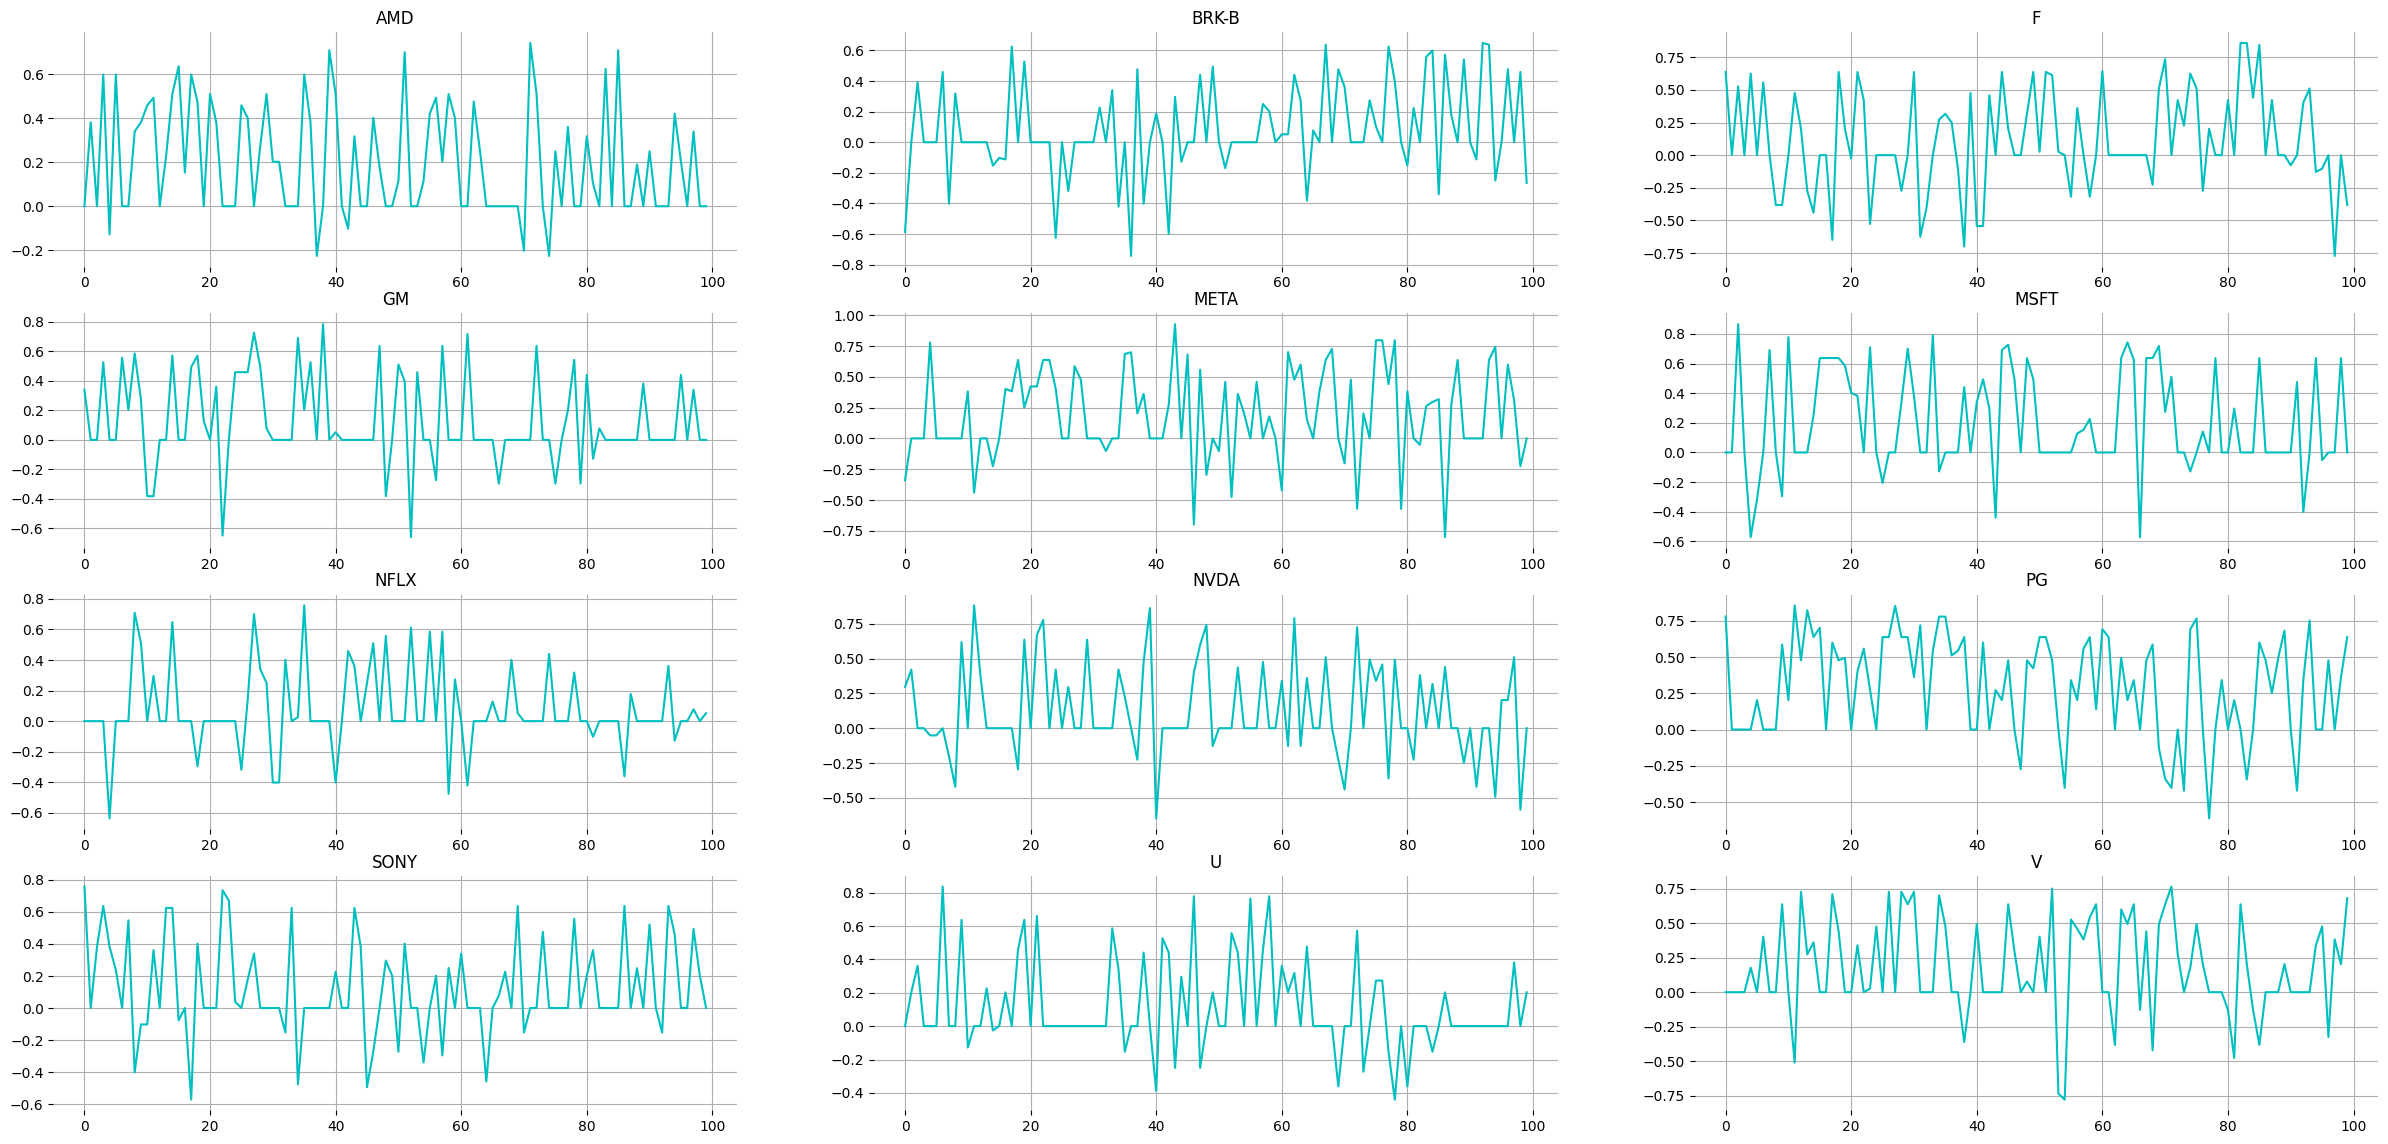

In [ ]:
fig = plt.figure(figsize=(30, 14))

for company, sentiment_scores in sentiment_plot.items():
  plot_index = company_list.index(company) + 1
  plot_col = 3
  plot_row = len(company_list) // plot_col
  ax = fig.add_subplot(plot_row, plot_col, plot_index, frameon=False)
  ax.grid(True)
  ax.set_title(company)
  ax.plot(sentiment_scores, color='c')
plt.show()

## Plot volatility

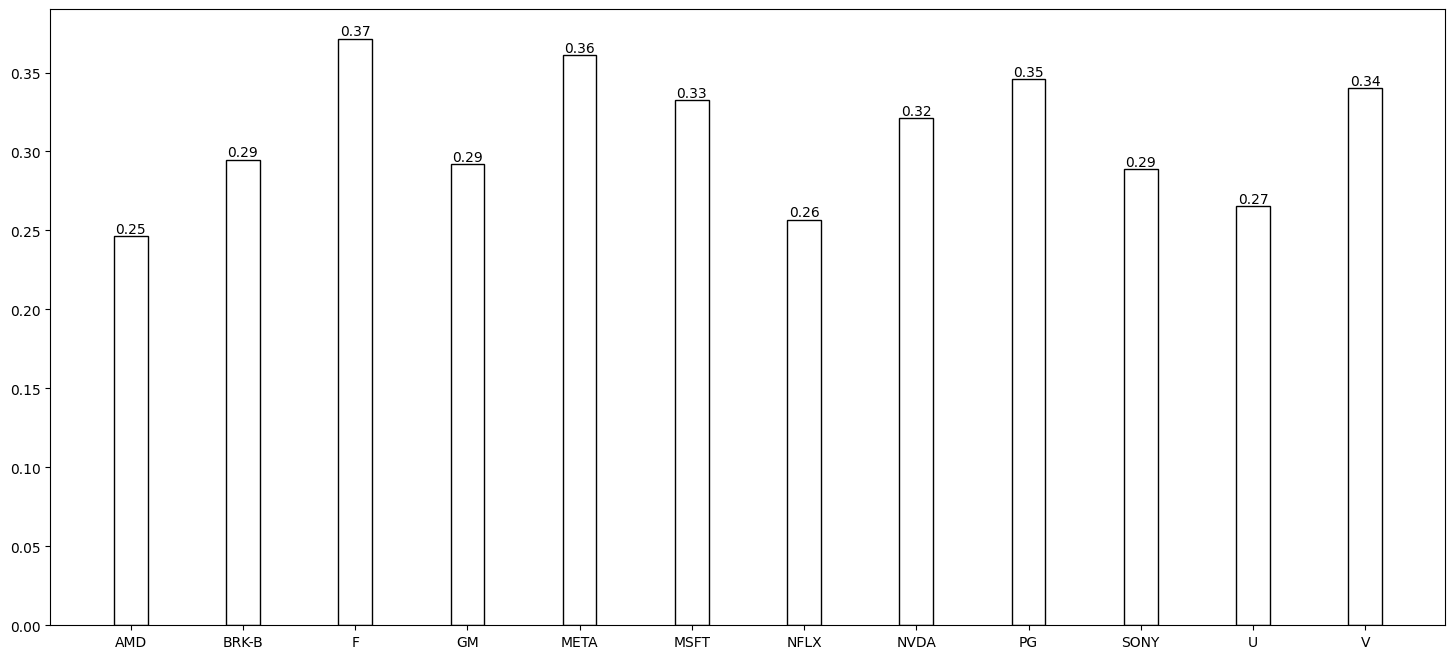

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
volatility_plot = {}

for company, sentiment_scores in sentiment_plot.items():
  volatility_plot[company] = np.std(sentiment_scores)

for company, volatility in volatility_plot.items():
  plt.text(company_list.index(company), volatility, f"{volatility:.2f}", ha='center', va='bottom')

ax.bar(company_list, volatility_plot.values(), 0.3, color='w', edgecolor='k')
plt.show()

# Predict stock price

## Use linear autoregression

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Dữ liệu gốc
data = {
    "Ngày Kết Thúc Kỳ": ["TTM", "12/31/2023", "12/31/2022", "12/31/2021", "12/31/2020", "12/31/2019", "12/31/2018", "12/31/2017"],
    "Số Cổ Phiếu Đang Lưu Hành": [1618.00, 1616.00, 1612.00, 1207.00, 1211.00, 1170.00, 1005.00, 967.00],
    "Vốn Hóa Thị Trường": [259304.61, 259304.61, 238140.86, 104432.56, 175284.59, 110998.11, 50692.44, 17802.18]
}

# Tạo DataFrame
df = pd.DataFrame(data)
df['Ngày Kết Thúc Kỳ'] = pd.to_datetime(df['Ngày Kết Thúc Kỳ'], format='%m/%d/%Y', errors='coerce')
df = df.sort_values(by='Ngày Kết Thúc Kỳ')

# Tính giá cổ phiếu trung bình
df['Giá Cổ Phiếu Trung Bình'] = df['Vốn Hóa Thị Trường'] / df['Số Cổ Phiếu Đang Lưu Hành']

# Xây dựng và huấn luyện mô hình Linear Autoregression
train_data = df['Giá Cổ Phiếu Trung Bình'].dropna().values
model = AutoReg(train_data, lags=0).fit()

# Dự đoán giá cổ phiếu cho kỳ tiếp theo
predicted_price = model.predict(start=len(train_data), end=len(train_data))[0]

# Hiển thị kết quả

In [ ]:
predicted_price

107.9299345926264